In [1]:
import csv
import json
import datetime
import pandas as pd
import numpy as np
from gensim.models import phrases 
from gensim import corpora, models, similarities #calc all similarities at once, from http://radimrehurek.com/gensim/tut3.html
from scipy import spatial
from gensim.models import Word2Vec, KeyedVectors
import requests

In [2]:
datafile = 'C:/Users/marce/Documents/Insight_Project/Project/data/processed/triplet_training_data_with_features.csv'
data = pd.read_csv(datafile, index_col=0)



corr_matrix = data.corr()
corr_matrix["scores"].sort_values(ascending=False)

y = data['scores']
X = data.iloc[:,:113]

X.head()

,0,1,2,3,4,5,6,7,8,9,...,av_temp,sun_hrs,wind_kmh,rain_mm,density,population,healthins1,healthins2,poverty_score1,poverty_score2
0,0.067387,-0.029608,-0.128419,0.162152,0.163158,-0.102111,0.026653,0.042646,-0.0743,0.06013,...,18.0,14.5,11.0,0.0,3.716683,5398.0,3555.0,324.0,511.0,54465.0
1,0.067387,-0.029608,-0.128419,0.162152,0.163158,-0.102111,0.026653,0.042646,-0.0743,0.06013,...,15.0,13.5,8.0,38.2,3.716683,5398.0,3555.0,324.0,511.0,54465.0
2,0.067387,-0.029608,-0.128419,0.162152,0.163158,-0.102111,0.026653,0.042646,-0.0743,0.06013,...,13.0,11.3,16.0,0.0,105.750646,36073.0,24997.0,3305.0,3387.0,63681.0
3,0.067387,-0.029608,-0.128419,0.162152,0.163158,-0.102111,0.026653,0.042646,-0.0743,0.06013,...,21.0,14.5,8.0,0.0,1034.719877,2188649.0,1776493.0,118292.0,202628.0,94822.0
4,0.067387,-0.029608,-0.128419,0.162152,0.163158,-0.102111,0.026653,0.042646,-0.0743,0.06013,...,25.0,9.4,13.0,36.4,73475.209692,1664727.0,1270399.0,83332.0,245347.0,84610.0


# Boosted Trees

Due to the nature of the data - decision trees make the most sense

In [3]:
X_resampled, y_resampled = SMOTE().fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))

from xgboost import XGBClassifier
import xgboost as xgb
# read in data
clf4 = XGBClassifier()
clf4.fit(X_train, y_train)
y_pred = clf4.predict(X_test)
print('accuracy:', accuracy_score(y_test,y_pred))

cm = confusion_matrix(y_test,y_pred)
print(cm)
from sklearn.metrics import classification_report
report=classification_report(y_test, y_pred) 
print(report)

NameError: name 'SMOTE' is not defined

In [148]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


clf3 = GradientBoostingClassifier()
clf3.fit(X_train, y_train)
y_pred = clf3.predict(X_test)
print('accuracy:',accuracy_score(y_test,y_pred))

cm=confusion_matrix(y_test,y_pred)
print(cm)
from sklearn.metrics import classification_report
report=classification_report(y_test, y_pred) 
print(report)

accuracy: 0.7593123209169055
[[245 104]
 [ 64 285]]
              precision    recall  f1-score   support

           0       0.79      0.70      0.74       349
           1       0.73      0.82      0.77       349

    accuracy                           0.76       698
   macro avg       0.76      0.76      0.76       698
weighted avg       0.76      0.76      0.76       698



# Random Forest

In [4]:
# with only word2vec embedding

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score,accuracy_score
from sklearn.base import clone
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE, ADASYN
from collections import Counter

X_resampled, y_resampled = SMOTE().fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('accuracy:',accuracy_score(y_test,y_pred))

cm=confusion_matrix(y_test,y_pred)
print(cm)
from sklearn.metrics import classification_report
report=classification_report(y_test, y_pred) 
print(report)

[(0, 1744), (1, 1744)]
accuracy: 0.7865329512893983
[[259  90]
 [ 59 290]]
              precision    recall  f1-score   support

           0       0.81      0.74      0.78       349
           1       0.76      0.83      0.80       349

    accuracy                           0.79       698
   macro avg       0.79      0.79      0.79       698
weighted avg       0.79      0.79      0.79       698



In [5]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 100, num = 10)] # of trees in the forest
max_features = ['auto', 'sqrt','log2'] #number of features to consider when looking for the best split
max_depth = [1,2,3]  # maximum depth of the tree
max_depth.append(None)
min_samples_split = [1, 2, 5] # min number of samples required to split an internal node
min_samples_leaf = [1, 2, 4] #min number of samples in a leaf node
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [5, 15, 26, 36, 47, 57, 68, 78, 89, 100], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [1, 2, 3, None], 'min_samples_split': [1, 2, 5], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [6]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import precision_score, recall_score,accuracy_score
from sklearn.base import clone
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 200, cv = 3, scoring='accuracy', random_state=42, verbose=2, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   36.8s finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, 2, 3, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [1, 2, 5],
                                        'n_estimators': [5, 15, 26, 36, 47, 57,
                                                         68, 78, 89, 100]},
                   random_state=42, scoring='accuracy', verbose=2)

In [7]:
print(rf_random.best_params_)

{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}


In [8]:
from statistics import mean

X_training, X_testing, y_training, y_testing = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

best_random = rf_random.best_estimator_
best_random.fit(X_training, y_training)
best_random_prediction = best_random.predict(X_testing)
print('accuracy:',accuracy_score(y_testing,best_random_prediction))
print('f1:',f1_score(y_testing,best_random_prediction))
print('precision:',precision_score(y_testing,best_random_prediction))
print('recall:',recall_score(y_testing,best_random_prediction))

cm=confusion_matrix(y_testing,best_random_prediction)
print(cm)


accuracies = []
f1 = []
precisions = []
recalls = []

skfolds = StratifiedShuffleSplit(n_splits=3)
for train_index, test_index in skfolds.split(X_resampled, y_resampled):
    best_random_valid = clone(best_random)
    best_random_valid.fit(X_resampled.iloc[train_index], y_resampled.iloc[train_index])
    y_pred = best_random_valid.predict(X_resampled.iloc[test_index])
    accuracies.append(accuracy_score(y_resampled.iloc[test_index],y_pred))
    f1.append(f1_score(y_resampled.iloc[test_index],y_pred))
    precisions.append(precision_score(y_resampled.iloc[test_index],y_pred))
    recalls.append(recall_score(y_resampled.iloc[test_index],y_pred))
    
print('Cross-validated accuracy: ', mean(accuracies))
print('Cross-validated f1: ', mean(f1))
print('Cross-validated precision: ', mean(precisions))
print('Cross-validated recall: ', mean(recalls))


# plot_confusion_matrix(best_random, X_testing, y_testing)
# plt.show()

accuracy: 0.7808022922636103
f1: 0.7929634641407308
precision: 0.7512820512820513
recall: 0.839541547277937
[[252  97]
 [ 56 293]]
Cross-validated accuracy:  0.778414517669532
Cross-validated f1:  0.7835171636051577
Cross-validated precision:  0.7662933425370636
Cross-validated recall:  0.8035139573070608


NameError: name 'plot_confusion_matrix' is not defined

In [23]:
importances = list(best_random.feature_importances_)

print(sum(importances[:100]))
print(sum(importances[100]))

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(names, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

0.5427621417351152


TypeError: 'numpy.float64' object is not iterable

## current best results:

accuracy: 0.79

f1: 0.80

precision: 0.76

recall: 0.84

# Simple Neural Network

In [197]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_training)
X_training2 = scaler.transform(X_training)  # doctest: +SKIP
# apply same transformation to test data
X_testing2 = scaler.transform(X_testing)  # doctest: +SKIP
clf2 = MLPClassifier(solver='adam', early_stopping=True, max_iter=100, alpha=1e-6, hidden_layer_sizes=(100, 50, 20), random_state=1)
clf2.fit(X_training2, y_training)
neural_pred = clf2.predict(X_testing2)
print('accuracy:',accuracy_score(y_testing, neural_pred))
print('f1:',f1_score(y_testing, neural_pred))
print('precision:',precision_score(y_testing, neural_pred))
print('recall:',recall_score(y_testing, neural_pred))

accuracies = []
f1 = []
precisions = []
recalls = []


skfolds = StratifiedShuffleSplit(n_splits=3)
for train_index, test_index in skfolds.split(X_resampled, y_resampled):
    clf2_valid = clone(clf2)
    scaler_valid = clone(scaler)
    scaler_valid.fit(X_resampled.iloc[train_index])
    X_training = scaler_valid.transform(X_resampled.iloc[train_index])
    X_testing = scaler_valid.transform(X_resampled.iloc[test_index])
    clf2_valid.fit(X_training, y_resampled.iloc[train_index])
    y_pred = clf2_valid.predict(X_testing)
    accuracies.append(accuracy_score(y_resampled.iloc[test_index],y_pred))
    f1.append(f1_score(y_resampled.iloc[test_index],y_pred))
    precisions.append(precision_score(y_resampled.iloc[test_index],y_pred))
    recalls.append(recall_score(y_resampled.iloc[test_index],y_pred))
    
print('Cross-validated accuracy: ', mean(accuracies))
print('Cross-validated f1: ', mean(f1))
print('Cross-validated precision: ', mean(precisions))
print('Cross-validated recall: ', mean(recalls))

cm = confusion_matrix(y_testing,neural_pred)
print(cm)
plot_confusion_matrix(clf2, X_testing2, y_testing)
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [3139, 2790]

In [274]:
import pickle
pickle.dump(best_random, open('optimized_random_for.sav', 'wb'))
pickle.dump(clf, open('classifier_random_for.sav', 'wb'))

# Ensemble Learning

accuracy: 0.7922636103151862
f1: 0.8010973936899863
precision: 0.7684210526315789
recall: 0.836676217765043
[[261  88]
 [ 57 292]]


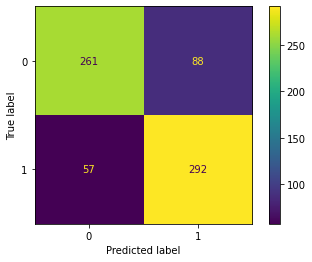

In [206]:
from sklearn.ensemble import VotingClassifier
X_training, X_testing, y_training, y_testing = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

rnd_clf = clone(best_random)
xgb_clf = XGBClassifier()
lga_clf = LinearDiscriminantAnalysis()

voting_clf = VotingClassifier(estimators=[('rf', rnd_clf), ('xgb', xgb_clf), ('lga', lga_clf)], voting='hard', n_jobs=-1)



voting_clf.fit(X_training, y_training)
voting_pred = voting_clf.predict(X_testing)

print('accuracy:',accuracy_score(y_testing, voting_pred))
print('f1:',f1_score(y_testing, voting_pred))
print('precision:',precision_score(y_testing, voting_pred))
print('recall:',recall_score(y_testing, voting_pred))
cm = confusion_matrix(y_testing, voting_pred)
print(cm)

plot_confusion_matrix(voting_clf, X_testing, y_testing)
plt.show()

In [208]:
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 100, num = 10)] # of trees in the forest
max_features = ['auto', 'sqrt','log2'] #number of features to consider when looking for the best split
max_depth = [1,2,3]  # maximum depth of the tree
max_depth.append(None)
min_samples_split = [1, 2, 5] # min number of samples required to split an internal node
min_samples_leaf = [1, 2, 4] #min number of samples in a leaf node
bootstrap = [True, False]
booster = ['gbtree', 'gblinear', 'dart']
solver = ['svd', 'lsqr', 'eigen']
random_grid = {'rf__n_estimators': n_estimators,
               'rf__max_features': max_features,
               'rf__max_depth': max_depth,
               'rf__min_samples_split': min_samples_split,
               'rf__min_samples_leaf': min_samples_leaf,
               'rf__bootstrap': bootstrap,
               'lga__solver': solver,
               'xgb__booster': booster}
print(random_grid)


voting_clf_opt = RandomizedSearchCV(estimator = voting_clf, param_distributions = random_grid, n_iter = 200, cv = 3, scoring='f1', random_state=42, verbose=2, n_jobs = -1)
voting_clf_opt.fit(X_train, y_train)

{'rf__n_estimators': [5, 15, 26, 36, 47, 57, 68, 78, 89, 100], 'rf__max_features': ['auto', 'sqrt', 'log2'], 'rf__max_depth': [1, 2, 3, None], 'rf__min_samples_split': [1, 2, 5], 'rf__min_samples_leaf': [1, 2, 4], 'rf__bootstrap': [True, False], 'lga__solver': ['svd', 'lsqr', 'eigen'], 'xgb__booster': ['gbtree', 'gblinear', 'dart']}
Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 162 tasks      | elapsed:   30.6s
[Parallel(n_jobs=-1)]: Done 365 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  3.2min finished


RandomizedSearchCV(cv=3,
                   estimator=VotingClassifier(estimators=[('rf',
                                                           RandomForestClassifier(max_features='sqrt',
                                                                                  min_samples_split=5)),
                                                          ('xgb',
                                                           XGBClassifier(base_score=None,
                                                                         booster=None,
                                                                         colsample_bylevel=None,
                                                                         colsample_bynode=None,
                                                                         colsample_bytree=None,
                                                                         gamma=None,
                                                                         gpu_id=None,

In [209]:
print(voting_clf_opt.best_params_)

{'xgb__booster': 'dart', 'rf__n_estimators': 5, 'rf__min_samples_split': 5, 'rf__min_samples_leaf': 1, 'rf__max_features': 'auto', 'rf__max_depth': None, 'rf__bootstrap': True, 'lga__solver': 'lsqr'}


accuracy: 0.7836676217765043
f1: 0.7945578231292517
precision: 0.7564766839378239
recall: 0.836676217765043
[[255  94]
 [ 57 292]]
Cross-validated accuracy:  0.8118433619866284
Cross-validated f1:  0.8139527605247634
Cross-validated precision:  0.8075999242455737
Cross-validated recall:  0.820952380952381


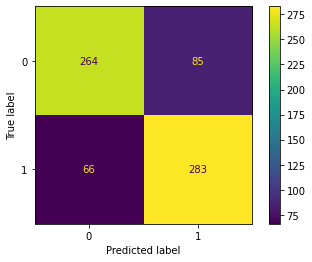

In [214]:
from sklearn.metrics import plot_confusion_matrix
from statistics import mean
import matplotlib.pyplot as plt


X_training, X_testing, y_training, y_testing = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

best_voting = voting_clf_opt.best_estimator_
best_voting.fit(X_training, y_training)
best_voting_prediction = best_voting.predict(X_testing)
print('accuracy:',accuracy_score(y_testing,best_random_prediction))
print('f1:',f1_score(y_testing,best_random_prediction))
print('precision:',precision_score(y_testing,best_random_prediction))
print('recall:',recall_score(y_testing,best_random_prediction))

cm=confusion_matrix(y_testing,best_random_prediction)
print(cm)


accuracies = []
f1 = []
precisions = []
recalls = []

skfolds = StratifiedShuffleSplit(n_splits=3)
for train_index, test_index in skfolds.split(X_resampled, y_resampled):
    best_voting_valid = clone(best_voting)
    best_voting_valid.fit(X_resampled.iloc[train_index], y_resampled.iloc[train_index])
    y_pred = best_voting_valid.predict(X_resampled.iloc[test_index])
    accuracies.append(accuracy_score(y_resampled.iloc[test_index],y_pred))
    f1.append(f1_score(y_resampled.iloc[test_index],y_pred))
    precisions.append(precision_score(y_resampled.iloc[test_index],y_pred))
    recalls.append(recall_score(y_resampled.iloc[test_index],y_pred))
    
print('Cross-validated accuracy: ', mean(accuracies))
print('Cross-validated f1: ', mean(f1))
print('Cross-validated precision: ', mean(precisions))
print('Cross-validated recall: ', mean(recalls))


plot_confusion_matrix(best_voting, X_testing, y_testing)
plt.show()

accuracy: 0.80

f1: 0.81

precision: 0.78

recall: 0.84

# BERT Retraining (using Flair)

In [ ]:
import flair